In [7]:
#!pip install Keras-Preprocessing
import numpy as np
from keras import models, layers, optimizers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn import preprocessing
# Load the data
df=pd.read_csv("IMDB Dataset.csv")

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
train_df = df.sample(frac=0.8, random_state=25)
test_df = df.drop(train_df.index)


In [4]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df, test_size=0.2,random_state=25)

In [5]:
print(train_df)

                                                  review sentiment
46392  Director Jay Craven's adaptation of Howard Fra...  positive
6132   I couldn't wait to see this movie. About half ...  negative
23427  First of all, I think the below comment is unw...  positive
14660  Probably one of the most boriest slasher movie...  negative
4046   Twins Effect, starring some of HK's most popul...  positive
...                                                  ...       ...
35702  In a not totally successful attempt to be take...  negative
26767  The case of the Scorpion's tail is a highly st...  positive
6618   Atlantis: The Lost Empire is a better movie th...  positive
24894  I thought this series was going to be another ...  negative
29828  I saw this movie as a very young girl (I'm 27 ...  negative

[40000 rows x 2 columns]


In [6]:
print(test_df)

                                                  review sentiment
13920  Kudos to Fawcett to taking on roles that, at t...  positive
23439  If you are a fan of early Duke movies, this Lo...  positive
11851  I'd love to give this movie a 10/10, but in it...  positive
8278   The credits at the end read "ALL directed by S...  negative
31258  This young filmmaker has a talent for capturin...  positive
...                                                  ...       ...
39883  This is a thinking man's silly movie. If you d...  positive
40521  There's a sign on The Lost Highway that says:<...  positive
19434  Can any one help find out the title and artist...  positive
4571   Having watched the first scene, I realized the...  negative
33562  This is a very dramatic and suspenseful movie....  positive

[10000 rows x 2 columns]


In [7]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['review'].tolist())

# Convert the text data to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_df['review'].tolist())
test_sequences = tokenizer.texts_to_sequences(test_df['review'].tolist())

# Pad the sequences to a fixed length
max_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

# Convert the labels to categorical
label_encoder = preprocessing.LabelEncoder()
train_labels= label_encoder.fit_transform(train_df['sentiment'])
#train_labels = to_categorical(train_df['sentiment'])


In [8]:
model = models.Sequential()
model.add(layers.Embedding(10000, 64, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1000/1000 [==============================] - 22s 21ms/step - loss: 0.4161 - accuracy: 0.8001 - val_loss: 0.3263 - val_accuracy: 0.8594
Epoch 2/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.1570 - accuracy: 0.9431 - val_loss: 0.4034 - val_accuracy: 0.8504
Epoch 3/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0324 - accuracy: 0.9912 - val_loss: 0.5766 - val_accuracy: 0.8418
Epoch 4/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0074 - accuracy: 0.9984 - val_loss: 0.7188 - val_accuracy: 0.8499
Epoch 5/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.8735 - val_accuracy: 0.8465
Epoch 6/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0065 - accuracy: 0.9982 - val_loss: 1.0254 - val_accuracy: 0.8367
Epoch 7/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.9917 -

In [12]:
test_labels= label_encoder.fit_transform(test_df['sentiment'])
print(test_labels[2])
#test_labels = to_categorical(test_df['sentiment'])
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)


0
313/313 [==============================] - 1s 4ms/step - loss: 1.2784 - accuracy: 0.8339
Test accuracy: 0.833899974822998


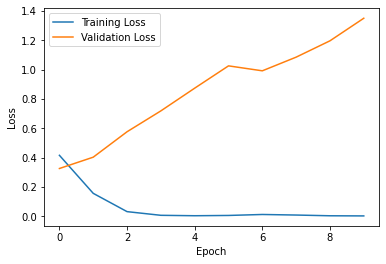

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


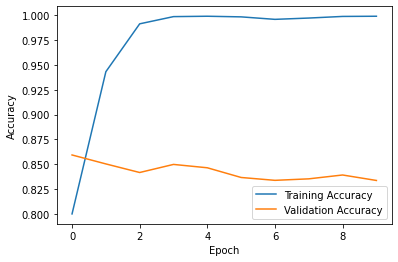

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [16]:
text = tokenizer.sequences_to_texts(test_data)

In [17]:
pred = np.zeros(len(predictions))
for i, score in enumerate(predictions):
    pred[i] = np.round(score)
    
predicted_sentiments = ['positive' if label == 1 else 'negative' for label in pred]    

In [18]:
print(f"Review text: {text[4]}\n")
print(f"Review : {predicted_sentiments[4]}")


Review text: average and surprisingly tame fulci giallo which means it's still quite bad by normal standards but by its solid build up and some nice touches such as a neat time twist on the issues of visions and br br the well known weaknesses are in full gear banal dialogue wooden acting illogical plot points and the finale goes on much too long while the denouement proves to be a rather lame or shall i say limp affair br br fulci's ironic handling of giallo is amusing though yellow clues wherever you look br br 3 out of 10 killers

Review : negative
